# Figure G: Cluster coherence

In [5]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
from sklearn import metrics
matplotlib.style.use('styles.mplstyle')

In [6]:
dfs, contours = load_datasets()

In [3]:
erk_contours = [Contour(pitches) for pitches in contours['erk']]

In [4]:
def get_types(typology, contours):
    types = [typology.classify(c) for c in contours]
    X = [c.pitches for c in contours]
    return X, types

def silhouete_score(*args): 
    return metrics.silhouette_score(*get_types(*args))

def calinski_harabasz_score(*args): 
    return metrics.calinski_harabasz_score(*get_types(*args))

In [5]:
def get_scores(scoring_fn, contours, xs=np.linspace(0, 10, 50)):
    opt = TypologyOptimizer(HuronTypology, scoring_fn=scoring_fn)
    f = opt.loss_function(contours, ['tolerance'])
    ys = [-1 * f([x]) for x in xs]
    return ys

In [88]:
xs = np.linspace(0, 6, 100)
values = {}
values['silhouete'] = get_scores(silhouete_score, erk_contours[:1000], xs)
values['calinski_harabasz'] = get_scores(calinski_harabasz_score, erk_contours[:1000], xs)

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


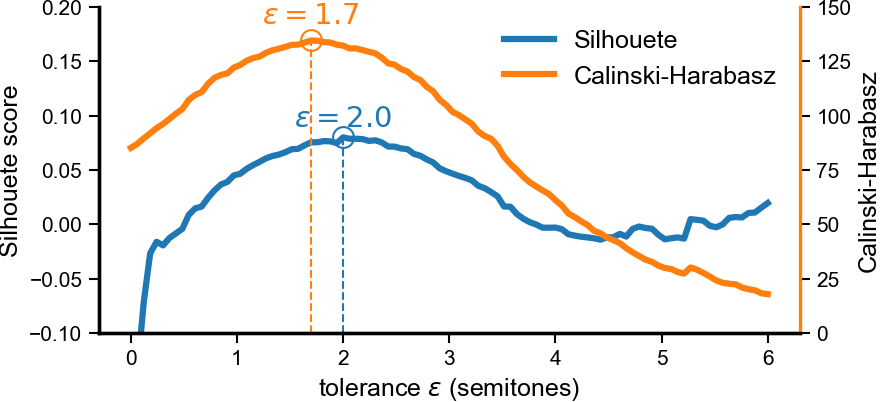

In [89]:
#https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html
fig, host = plt.subplots(figsize=cm2inch(8, 4))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
host.set_ylabel('Silhouete score')
par1.set_ylabel('Calinski-Harabasz')
par1.spines["right"].set_color('C1')
par1.spines["right"].set_visible(True)

l1, = host.plot(xs, values['silhouete'], c='C0', label='Silhouete')
l2, = par1.plot(xs, values['calinski_harabasz'], c='C1', label='Calinski-Harabasz')

lines = [l1, l2]
par1.legend(lines, [l.get_label() for l in lines])
host.set_xlabel('tolerance $\epsilon$ (semitones)')
host.set_ylim(-.1, .2)
par1.set_ylim(0, 150)

sil_idx = np.argmax(values['silhouete'])
sil_x = xs[sil_idx]
sil_y = values['silhouete'][sil_idx]
host.plot(sil_x,sil_y, 'o', markerfacecolor="None", ms=5, markeredgewidth=.5)
host.plot([sil_x, sil_x], [-.1, sil_y], color='C0', ls='--', lw=.5)
host.text(sil_x, sil_y+.01, f'$\epsilon={sil_x:.2}$', ha='center', c='C0', fontsize=7)

ch_idx = np.argmax(values['calinski_harabasz'])
ch_x = xs[ch_idx]
ch_y = values['calinski_harabasz'][ch_idx]
par1.plot(ch_x, ch_y, 'o', c='C1', markerfacecolor="None", ms=5, markeredgewidth=.5)
par1.plot([ch_x, ch_x], [0, ch_y], color='C1', ls='--', lw=.5)
par1.text(ch_x, ch_y+8, f'$\epsilon={ch_x:.2}$', ha='center', c='C1', fontsize=7)
plt.tight_layout()

plt.savefig('../figures/figG1-cluster-coherence.pdf')